In [39]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
socio = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")

In [31]:
potholes.rename(columns = {"Community Area": "Community Area Number"}, inplace = True)


In [32]:
merge_table = pd.merge(potholes, socio, on="Community Area Number")

In [33]:
merge_table.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,LONGITUDE,LOCATION,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,12/31/2016,Completed - Dup,01/20/2017,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,...,-87.704066,"(42.011863340092, -87.704065711004)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
1,12/31/2016,Completed - Dup,01/20/2017,16-08564230,Pothole in Street,NaN,NaN,NaN,2427 W TOUHY AVE,60645.0,...,-87.691324,"(42.012147669417, -87.691324207371)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,12/31/2016,Completed,01/20/2017,16-08564274,Pothole in Street,Final Outcome,Pothole Patched,27.0,2353 W TOUHY AVE,60645.0,...,-87.689731,"(42.012167397287, -87.689730563436)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3,12/31/2016,Completed,01/20/2017,16-08564226,Pothole in Street,Final Outcome,Pothole Patched,5.0,2951 W TOUHY AVE,60645.0,...,-87.704066,"(42.011863340092, -87.704065711004)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
4,12/30/2016,Completed,01/23/2017,16-08545027,Pothole in Street,Final Outcome,Completed Upon Arrival,0.0,2600 W BRYN MAWR AVE,60659.0,...,-87.694345,"(41.983256100308, -87.694344829578)",West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0


In [34]:
potholes.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area Number,SSA,LATITUDE,LONGITUDE,LOCATION
0,12/31/2016,Completed - Dup,01/20/2017,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,1.155431e+06,1.947588e+06,50.0,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)"
1,12/31/2016,Completed,01/17/2017,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,1.166086e+06,1.942625e+06,48.0,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)"
2,12/31/2016,Completed,01/13/2017,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,1.139027e+06,1.900420e+06,29.0,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)"
3,12/31/2016,Completed,01/17/2017,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,1.142696e+06,1.934127e+06,39.0,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)"
4,12/31/2016,Completed,01/09/2017,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,1.143269e+06,1.941628e+06,39.0,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)"


In [35]:
socio.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [36]:
group_potholes = potholes.groupby("Community Area Number").count()
group_potholes.head()



,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
Community Area Number,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632


The r-squared is: nan


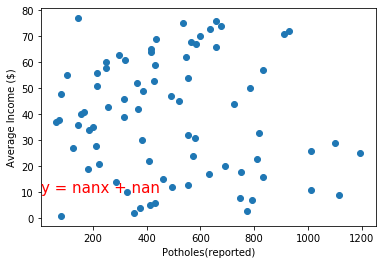

In [37]:
# Plot out potholes v socioeconomic status by ward
# Linear Regression 
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['Community Area Number']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Potholes(reported)')
plt.ylabel('Average Income ($)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.15861456004130886


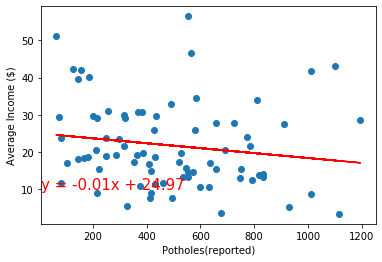

In [38]:
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['PERCENT HOUSEHOLDS BELOW POVERTY']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Potholes(reported)')
plt.ylabel('Average Income ($)')
print(f"The r-squared is: {rvalue}")
plt.show()